<a href="https://colab.research.google.com/github/IsuruKasun/ML_Project_-Identifying_Age-Related_Conditions/blob/main/ML_Project__Identifying_Age_Related_Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to predict if a person has any of three medical conditions,and predicting if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0).

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np

# **Data Preparation**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
directory_Path = '/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions'

Mounted at /content/drive


In [4]:
train             = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/train.csv')
test             = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/test.csv')
greeks            = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/greeks.csv')
submission = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/sample_submission.csv')

In [5]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [6]:
train.shape

(617, 58)

In [7]:
#replace the 'EJ' with 1 and 0

# Remove spaces from column names
train.columns = train.columns.str.replace(' ', '')

# Map values in the 'EJ' column
train['EJ'] = train['EJ'].replace({'A': 0, 'B': 1})

print(train['EJ'])

# same thiing for the test data set
test.columns = test.columns.str.replace(' ', '')
test['EJ'] = test['EJ'].replace({'A': 0, 'B': 1})
print(test['EJ'])

0      1
1      0
2      1
3      1
4      1
      ..
612    0
613    1
614    0
615    1
616    0
Name: EJ, Length: 617, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: EJ, dtype: int64


In [8]:
print(submission)

             Id  class_0  class_1
0  00eed32682bb      0.5      0.5
1  010ebe33f668      0.5      0.5
2  02fa521e1838      0.5      0.5
3  040e15f562a2      0.5      0.5
4  046e85c7cc7f      0.5      0.5


In [9]:
# check missing or null values
train.isnull().sum()


Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [10]:
# drop all null values of train df
new_train = train.dropna()

In [11]:
# check missing or null values
test.isnull().sum()
new_test = test.dropna()

In [12]:

new_train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.462860,3502.844518,118.817523,37.971167,10.196422,5.379830,0.062971,10.828981,8.718112,5382.822970,...,4.604619,3.746416,0.423671,20.552888,132.944954,15973.953703,31.364689,52.767917,9.448235,0.186131
std,0.395050,2281.427013,134.529098,68.540076,10.898788,2.506650,0.442135,4.408974,69.114063,3165.156480,...,9.095599,53.199582,1.376450,10.072061,151.520840,20083.928101,9.879365,37.285570,10.476576,0.389568
min,0.085460,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.874248,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.246766,2198.933605,85.200147,12.030297,8.138688,4.066281,0.025578,8.532908,1.229900,4161.104110,...,0.173229,0.552957,0.067730,14.020440,72.611063,3247.748035,25.033958,23.279172,0.150069,0.000000
50%,0.341840,3090.383560,85.200147,20.135146,8.138688,4.947752,0.025578,10.681890,1.229900,4992.779215,...,2.151784,1.157970,0.250601,18.650510,72.611063,8762.168480,30.519642,43.785085,0.594000,0.000000
75%,0.552285,4367.771182,107.739039,37.083478,8.138688,6.183582,0.037910,13.185360,5.390476,6020.698707,...,6.050474,1.506550,0.523214,25.064239,125.135266,21747.642820,36.822086,70.791728,21.978000,0.000000
max,4.435374,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [13]:

new_train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [14]:
new_test.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'],
      dtype='object')

#**Data Visualization**

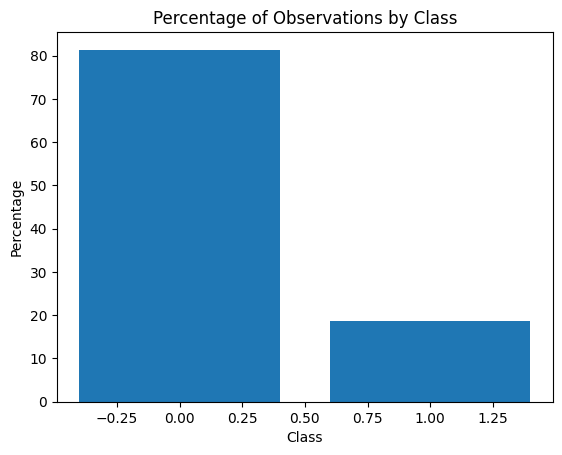

In [15]:
# find the persentage of (class 0) and (class 1)
import matplotlib.pyplot as plt

total = len(new_train['Class'])
class_counts = new_train['Class'].value_counts()
percentages = class_counts / total * 100

plt.bar(percentages.index, percentages.values)
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage of Observations by Class')
plt.show()


80% of data = class 0. 20% of data = class 1

In [16]:
# find the corrilation of train data set
new_train.corr()

<ipython-input-16-247ff3bffe03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_train.corr()


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.256934,0.297112,0.540094,0.130587,0.495659,0.017091,0.182103,0.418446,0.341972,...,0.099454,-0.002178,0.029381,0.355579,-0.017237,-0.017876,0.140713,0.005023,-0.097387,0.314508
AF,0.256934,1.000000,0.041656,0.186225,0.036253,0.217370,0.042965,0.217198,0.062178,0.037224,...,0.180405,0.010207,-0.005281,0.060867,0.061497,-0.180056,0.172277,0.151699,-0.167123,0.303462
AH,0.297112,0.041656,1.000000,0.138657,0.770954,0.029227,0.055315,0.097921,0.370304,0.214441,...,-0.032132,-0.010431,0.018075,0.174384,0.011045,-0.032204,-0.037749,-0.072408,0.027707,0.048066
AM,0.540094,0.186225,0.138657,1.000000,0.123677,0.248486,0.089897,0.134395,0.357050,0.307939,...,0.095133,-0.010488,0.036922,0.225486,-0.003772,-0.024081,0.093093,0.106041,-0.075795,0.268097
AR,0.130587,0.036253,0.770954,0.123677,1.000000,0.018392,0.101825,0.084399,0.074751,-0.004463,...,0.028110,-0.008082,0.066989,-0.005535,0.037313,0.020403,-0.134616,0.062232,0.023497,0.069562
AX,0.495659,0.217370,0.029227,0.248486,0.018392,1.000000,0.022299,0.308656,0.092115,0.137142,...,-0.041024,-0.020592,0.049259,0.248781,0.091763,0.119805,0.110600,0.099989,0.041714,0.123347
AY,0.017091,0.042965,0.055315,0.089897,0.101825,0.022299,1.000000,0.036766,0.132073,0.513457,...,-0.029804,-0.002994,-0.010373,0.028635,0.003059,-0.010206,0.208057,0.020524,0.064690,0.084060
AZ,0.182103,0.217198,0.097921,0.134395,0.084399,0.308656,0.036766,1.000000,0.033190,0.133294,...,-0.066338,-0.012824,0.017005,0.231829,0.000083,0.195131,0.115694,0.036492,0.084920,0.021859
BC,0.418446,0.062178,0.370304,0.357050,0.074751,0.092115,0.132073,0.033190,1.000000,0.761852,...,-0.017613,0.034095,0.017804,0.443297,0.052047,-0.050046,0.138309,-0.026234,0.035735,0.158355
BD,0.341972,0.037224,0.214441,0.307939,-0.004463,0.137142,0.513457,0.133294,0.761852,1.000000,...,-0.018509,-0.012080,0.019512,0.459725,-0.005768,-0.002705,0.236827,-0.021835,0.010194,0.113988


In [17]:
# plot the same thing in order to heat map to get more acurate plots
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-18-f6006b479d92>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = new_train.corr()


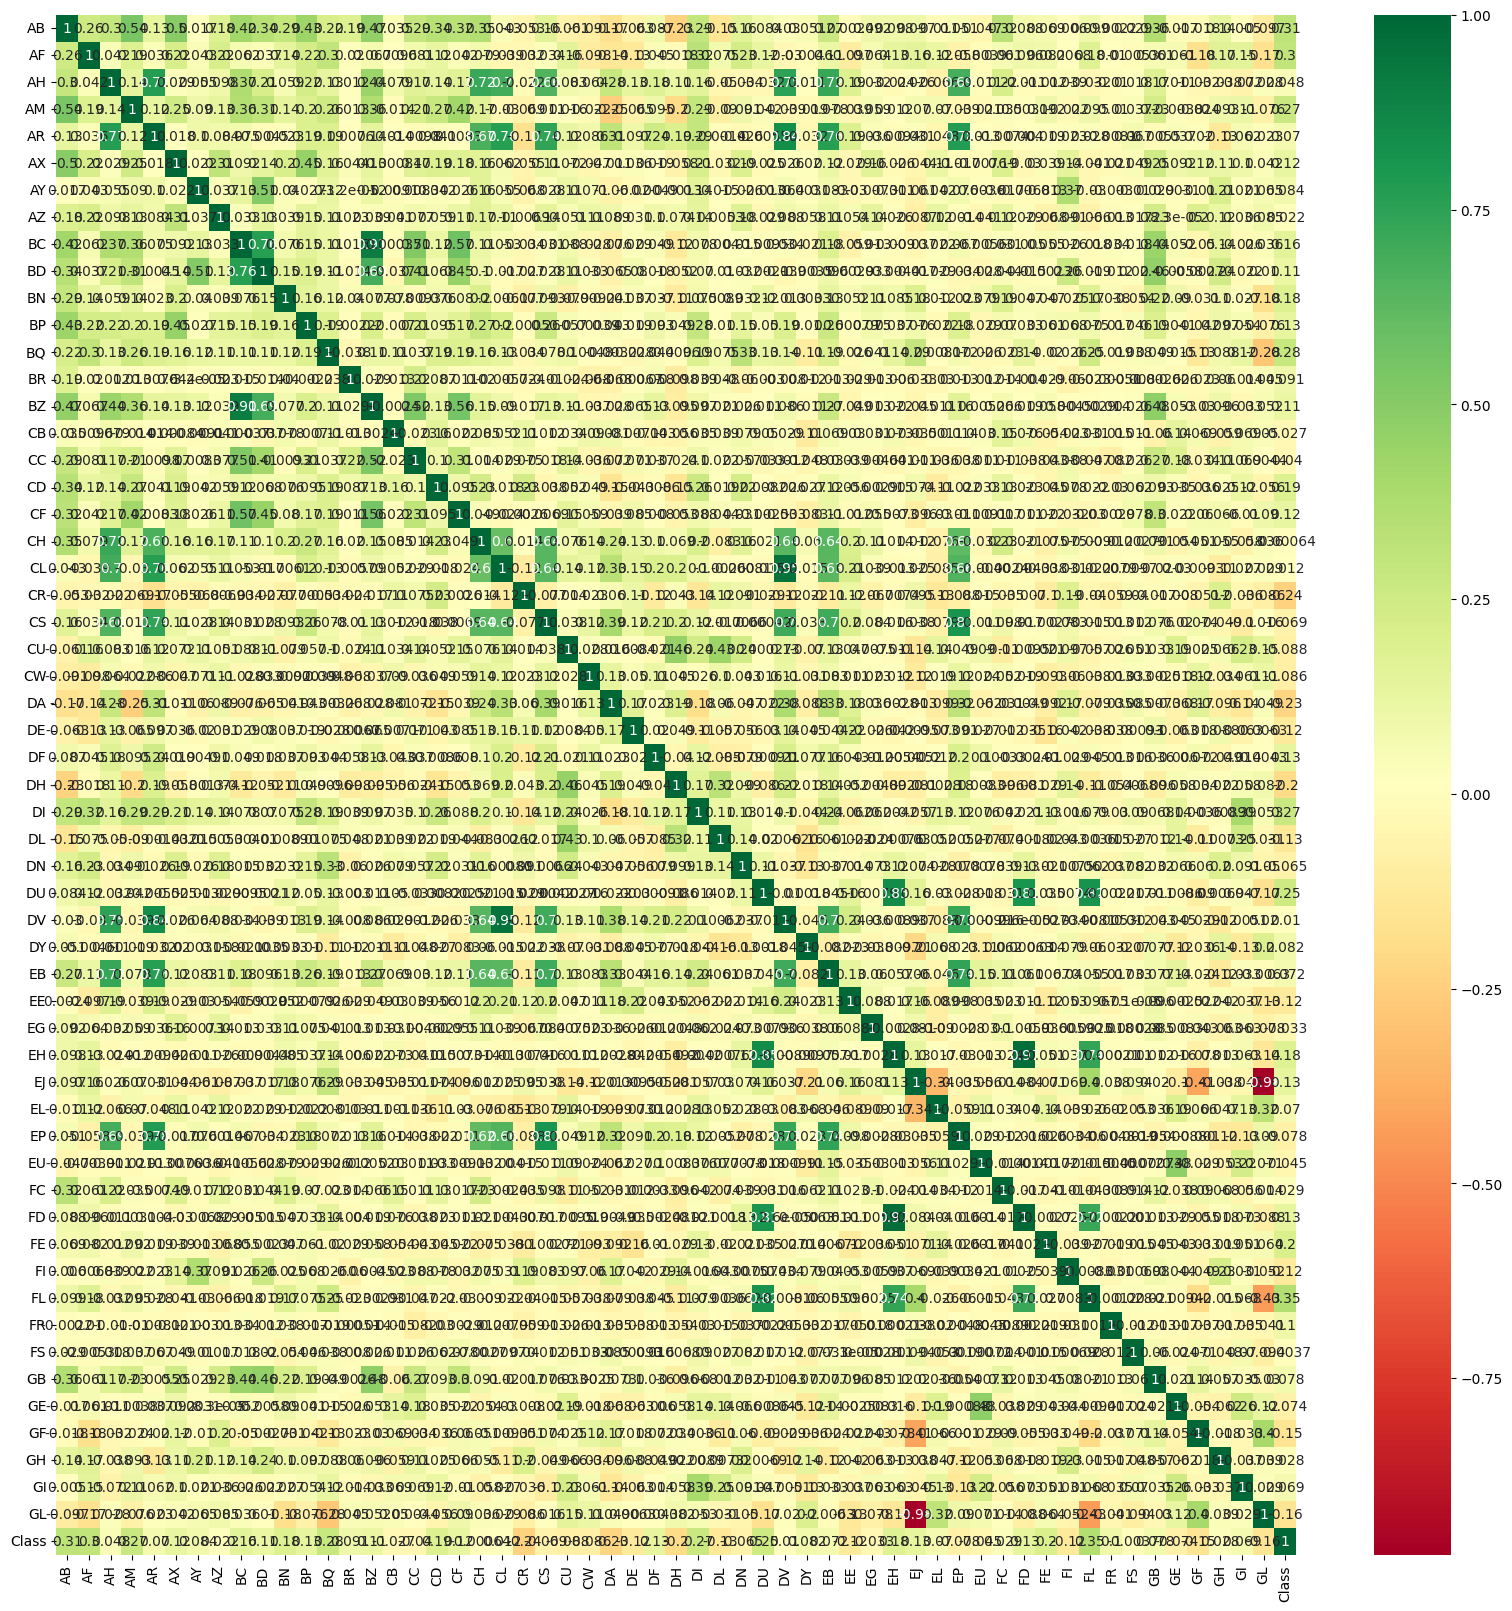

In [18]:
import seaborn as sns

corrmat = new_train.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g=sns.heatmap(new_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# grean = highly corelated
# red = negarively corelated
# The annot=True parameter adds the values of the correlation coefficients to the heatmap, and the cmap="RdYlGn" parameter sets the color map for the heatmap.


In [19]:
X = new_train.drop(['Id', 'Class'], axis=1)
Y = new_train['Class']


In [20]:
new_test_final = new_test.drop('Id', axis=1)

In [21]:
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees Regressor algorithm from the scikit-learn library to train a machine learning model for regression analysis.
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.03790147 0.02080686 0.00874516 0.03206459 0.01055693 0.01141583
 0.00394238 0.00404096 0.02865196 0.00772736 0.00966475 0.0076402
 0.03774942 0.01447517 0.00558847 0.01425865 0.01252948 0.01314822
 0.00598532 0.00755263 0.0064549  0.039698   0.0053626  0.01394919
 0.00558428 0.05081831 0.01574847 0.01303908 0.01373705 0.04530993
 0.01112796 0.0132009  0.11150901 0.00835249 0.01462294 0.01088221
 0.01495962 0.00809556 0.02487596 0.00367769 0.01198728 0.01434672
 0.00726342 0.00764097 0.01529694 0.01930214 0.02045824 0.07418301
 0.02881594 0.00779275 0.00868163 0.00922674 0.00830022 0.01229613
 0.00631024 0.02264566]


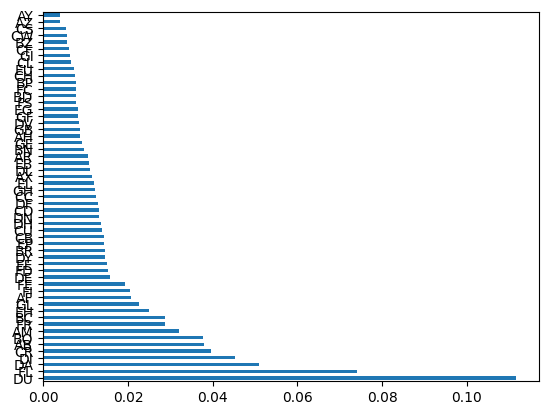

In [23]:
# plot the importance of features
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(55).plot(kind='barh')
plt.show()
# DU has more importantce

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# **Model Training**

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor


In [26]:
import numpy as np
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #The number of decision trees in the random forest.
print(n_estimators) # it simply creates an array of 12 integer values that could be used as the n_estimators hyperparameter when creating a RandomForestRegressor model later on.

# number of features to concider at every split
# "auto", which means that the algorithm will consider all the features at each split.
# "sqrt" means that the algorithm will consider the square root of the total number of features at each split
max_features = ['auto','sqrt']

# max numbers of leavels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
from sklearn.model_selection import RandomizedSearchCV #tuning. It uses cross-validation to evaluate the performance of each combination of hyperparameters and returns the best combination of hyperparameters that result in the best performance on the given dataset.
# CV = cross validation


In [28]:
# creat a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
rf = RandomForestRegressor()

In [30]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [31]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   7.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

#**predictions**

In [32]:
predictions= rf_random.predict(X_test)

In [33]:
predictions

array([0.016, 0.013, 0.431, 0.047, 0.578, 0.093, 0.057, 0.525, 0.061,
       0.05 , 0.069, 0.003, 0.169, 0.275, 0.352, 0.049, 0.378, 0.047,
       0.312, 0.347, 0.144, 0.014, 0.229, 0.042, 0.03 , 0.014, 0.028,
       0.464, 0.211, 0.063, 0.051, 0.01 , 0.027, 0.044, 0.013, 0.19 ,
       0.271, 0.037, 0.632, 0.077, 0.103, 0.118, 0.028, 0.015, 0.09 ,
       0.183, 0.022, 0.092, 0.557, 0.046, 0.131, 0.007, 0.171, 0.095,
       0.048, 0.42 , 0.096, 0.141, 0.155, 0.739, 0.052, 0.482, 0.006,
       0.159, 0.065, 0.063, 0.008, 0.051, 0.039, 0.444, 0.127, 0.563,
       0.036, 0.03 , 0.628, 0.318, 0.022, 0.536, 0.049, 0.155, 0.004,
       0.598, 0.721, 0.059, 0.054, 0.112, 0.083, 0.509, 0.196, 0.012,
       0.025, 0.3  , 0.378, 0.105, 0.032, 0.092, 0.203, 0.045, 0.124,
       0.078, 0.198, 0.149, 0.036, 0.063, 0.242, 0.213, 0.037, 0.072,
       0.345, 0.054])

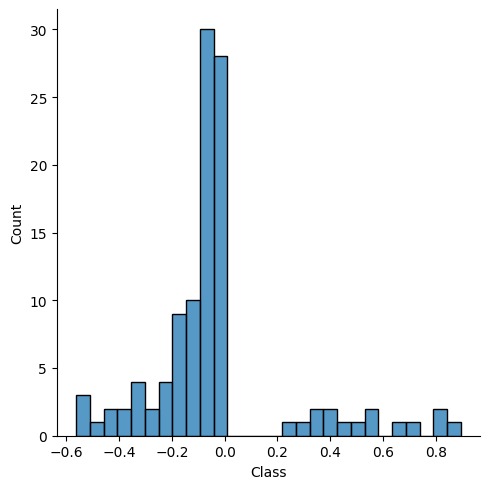

In [34]:
sns.displot(Y_test-predictions)

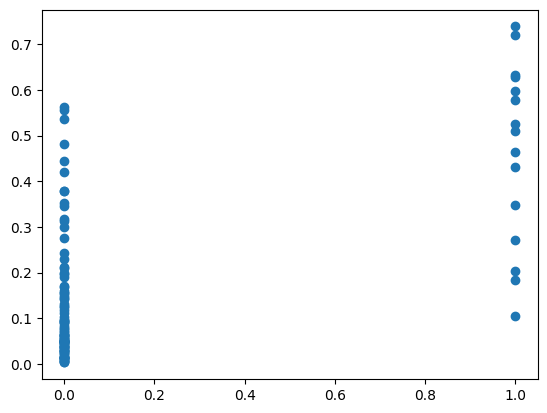

In [35]:
plt.scatter(Y_test,predictions)

In [36]:
import pickle

file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)  # R^2 score only measures the goodness of fit of the model
print('accuracy score:', r2)

accuracy score: 0.37748398596491217
